In [95]:
#1
import numpy as np
import itertools
op_hr=[18,6,30,48,6,36,18,18,30,36]
main_cost=[25,17,48,58,23,40,30,39,40,60]
mean_op_hr=np.mean(op_hr)
mean_main_cost=np.mean(main_cost)
sum1=0
for (i,j) in zip(op_hr,main_cost):
    val=(i-mean_op_hr)*(j-mean_main_cost)
    sum1=sum1+val
sum2=0
for i in op_hr:
    val1=(i-mean_op_hr)**2
    sum2=sum2+val1
slope=sum1/sum2
print("Slope is",slope)
intercept=mean_main_cost-slope*mean_op_hr
print("intercept term is",intercept)
print("Regression equation is",intercept,"+",slope,"x")
#calculating mean square error
pred=[]
for i in op_hr:
    predict=intercept+slope*i
    pred.append(predict)
error=0
for (i,j) in zip(main_cost,pred):
    val2=(i-j)**2
    error=error+val2
mse=error/len(main_cost)
print("Mean square error is",mse)
#R-square calculation
ss_total=0
for i in main_cost:
    val3=(i-mean_main_cost)**2
    ss_total=ss_total+val3
r_square=1-(error/ss_total)
print("R-Square value is",r_square)
#Prediction when operation hours increases 2 hours
prediction=intercept+slope*2
print("The maintenance cost is",prediction)

Slope is 0.9523809523809523
intercept term is 14.571428571428573
Regression equation is 14.571428571428573 + 0.9523809523809523 x
Mean square error is 36.05714285714286
R-Square value is 0.8094231350045303
The maintenance cost is 16.476190476190478


In [96]:
import pandas as pd
data=pd.read_csv("C:/Users/Hp/Downloads/housing.csv")
data.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [97]:
x=data.iloc[:,12:13]
y=data.iloc[:,13:14]

In [98]:
#modeling
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model=lin_reg.fit(x,y)
pred=model.predict(x)

In [99]:
#r-square
from sklearn.metrics import r2_score
r2=r2_score(y,pred)
print(r2)

0.5441462975864799


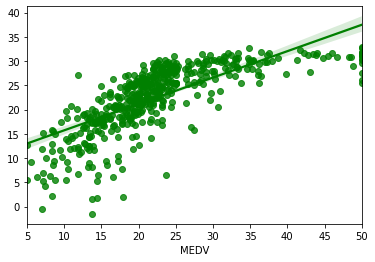

In [100]:
#plotting
import seaborn as sns
sns.regplot(y,pred,color="green")

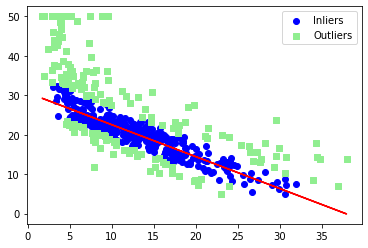

In [102]:
#RANSAC Fitting
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor(LinearRegression(),
                                               max_trials=100,#Maximum number of iterations
                                               min_samples=50,#Minimum number of interior point samples drawn
                                               )
model1=ransac.fit(x,y)
inlier_mask = model1.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
pred1=model1.predict(x)
plt.scatter(x[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='lightgreen',marker='s',label='Outliers')
plt.plot(x,pred1,color='red')
plt.legend(loc='upper right')
plt.show()

In [103]:
from sklearn.metrics import r2_score
r2=r2_score(y,pred1)
print(r2)

0.4777855334917892


In [104]:
#2
import pandas as pd
data=pd.read_csv("C:/Users/Hp/Downloads/housing.csv")
data.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [105]:
data1=data.drop(["AGE","DIS","RAD","TAX","PTRATIO","B"],axis=1)
data1.head()
x=data1.iloc[:,5:7]
y=data1.iloc[:,7:8]

In [106]:
#multivariate regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
model2=reg.fit(x,y)
pred2=model2.predict(x)
r2=r2_score(y,pred2)
print(r2)

0.6385616062603403


In [107]:

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly=PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred3=lin2.predict(X_poly)
r_2=r2_score(y,pred3)
print(r_2)

0.7572658522486412


# The varaibles RM and LSTAT both are important for model because these two     give good value of R-square as compare with the single variable model.